In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame
import operator
import matplotlib.cm as cm
import math

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)

X_after, test = train_test_split(x, test_size=0.2, random_state=42)
# test.to_csv(r'data_test_daily_c.csv', index = False, header=True)

X_after, test_daily = train_test_split(X_after, test_size=0.125, random_state=42)
# test.to_csv(r'data_test_final_c.csv', index = False, header=True)

colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
X_after.head()

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
23066,37.544962,127.136792,0.003333,0.024833,0.030333,0.404167,24.458333,13.375000
3263,37.487355,126.927102,0.003583,0.032000,0.030583,0.625000,50.666667,45.458333
24329,37.480917,126.971481,0.004000,0.023556,0.020444,0.438889,40.611111,25.000000
3190,37.540033,127.004850,0.003000,0.033800,0.006333,0.600000,38.533333,29.133333
9665,37.452357,126.908296,0.005429,0.027429,0.070143,0.628571,85.285714,53.571429


In [4]:
class K_means(object):

#     def __init__(self, k=3):
#         self.k = k

    def train(self, data, k, verbose=0):

        shape = data.shape

        ranges = np.zeros((shape[1], 5))
        centroids = np.zeros((shape[1], 5))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        centroids = np.zeros((k, shape[1]))
        for i in range(k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while True:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            distances = np.zeros((shape[0],k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            labels = np.argmin(distances, axis = 1)

            new_centroids = np.zeros((k, shape[1]))
            for centroid in range(k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()
                break

            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = math.sqrt(dist)
        return dists

    def getLabels(self):
        return self.labels

In [5]:
x2 = X_after[['Longitude','Latitude', 'O3','SO2', 'NO2' ]].copy()
x2.head()

,Longitude,Latitude,O3,SO2,NO2
23066,127.136792,37.544962,0.030333,0.003333,0.024833
3263,126.927102,37.487355,0.030583,0.003583,0.032000
24329,126.971481,37.480917,0.020444,0.004000,0.023556
3190,127.004850,37.540033,0.006333,0.003000,0.033800
9665,126.908296,37.452357,0.070143,0.005429,0.027429


In [6]:
x_array = np.array(x2)
x_array

array([[1.27136792e+02, 3.75449625e+01, 3.03333333e-02, 3.33333333e-03,
        2.48333333e-02],
       [1.26927102e+02, 3.74873546e+01, 3.05833333e-02, 3.58333333e-03,
        3.20000000e-02],
       [1.26971481e+02, 3.74809167e+01, 2.04444444e-02, 4.00000000e-03,
        2.35555556e-02],
       ...,
       [1.26856603e+02, 3.75259388e+01, 2.81250000e-02, 3.58333333e-03,
        2.69583333e-02],
       [1.26856603e+02, 3.75259388e+01, 2.80476190e-02, 7.23809524e-03,
        4.94761905e-02],
       [1.26974676e+02, 3.75642629e+01, 2.00555556e-02, 4.88888889e-03,
        5.38333333e-02]])

DONE!


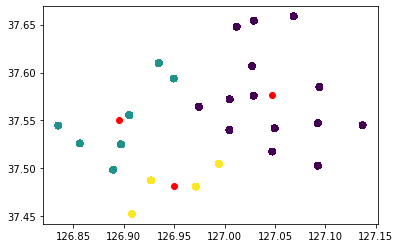

1

In [7]:
clf = K_means()
clf.train(x_array,3)

DONE!


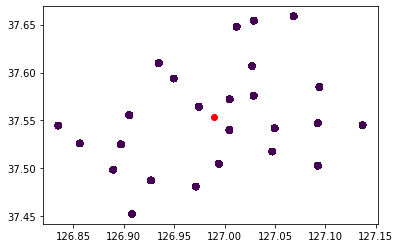

DONE!


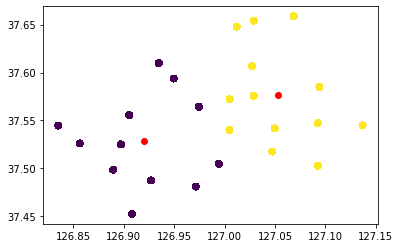

DONE!


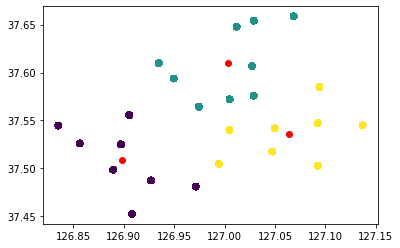

DONE!


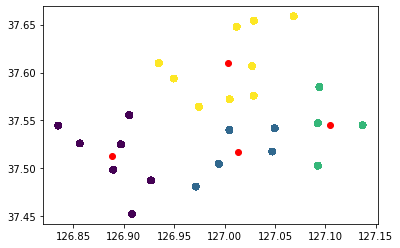

DONE!


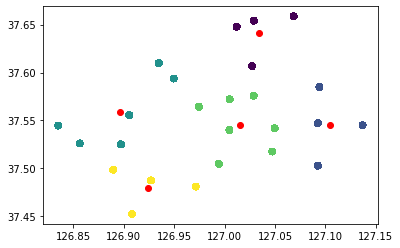

DONE!


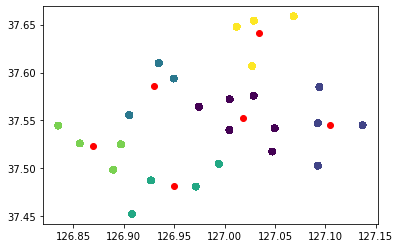

DONE!


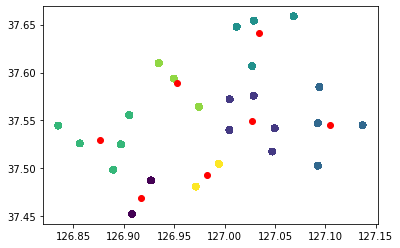

DONE!


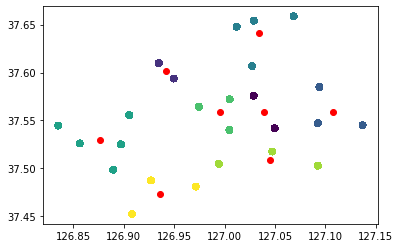

[array([40.7455164]), array([23.76057643, 24.60596787]), array([17.14823571, 18.94596401, 17.31324726]), array([15.12009656, 12.12434681, 10.4071001 , 18.94596401]), array([ 9.91916938, 10.4071001 , 15.12157756, 14.07858253, 10.38482061]), array([12.61797044, 10.4071001 ,  8.44197652, 10.93340047,  9.88354903,
        9.91916938]), array([ 6.08078573, 11.06073664, 10.4071001 ,  9.91916938, 11.51334279,
        7.82189087,  5.85507072]), array([ 6.12206094,  5.1528486 ,  8.32601035,  9.91916938, 11.51334279,
        7.44548053,  9.44996844,  8.67211243]), array([ 6.12206094,  5.1528486 ,  8.32601035,  9.91916938, 11.51334279,
        7.44548053,  9.44996844,  8.67211243]), array([ 6.12206094,  5.1528486 ,  8.32601035,  9.91916938, 11.51334279,
        7.44548053,  9.44996844,  8.67211243])]


In [8]:
list_distance = []
for x in range(1,11):
    kmeans = K_means()
    clf.train(x_array,x)
    list_distance.append(clf.getAverageDistance(x_array)) 
    
print(list_distance)

In [9]:
list_distance2 = []
for x in range (0,len(list_distance)):
    if len(list_distance[x]) > 1:
        avg = sum(list_distance[x]) / len(list_distance[x]) 
        list_distance2.append(avg)
    else:
        avg = sum(list_distance[x])
        list_distance2.append(avg)
print(list_distance2)

[40.745516397870674, 24.18327214927274, 17.802482327612353, 14.149376870135239, 11.982250035624649, 10.36719432376724, 8.951156605957772, 8.325124183310315, 8.325124183310315, 8.325124183310315]


<function matplotlib.pyplot.show(*args, **kw)>

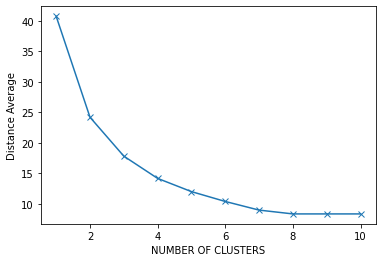

In [10]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,list_distance2, marker='x')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('Distance Average')
plt.show

DONE!


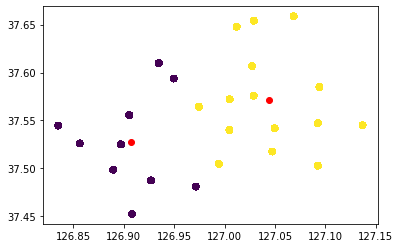

1

In [11]:
clf = K_means()
clf.train(x_array,2)